<a href="https://colab.research.google.com/github/stephmartinni/Projeto-em-Grupo---M-dulo-4/blob/main/Trabalho4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resumo do projeto do módulo 4

Realizamos a análise exploratória a partir das fontes de dados disponíveis no portal gov.br. Sendo utilizados os arquivos dos dois últimos meses do ano de 2023 (Etanol Hidratado + Gasolina C) contendo a série histórica dos preços da gasolina e do etanol em todo o Brasil.
Detalhes do projeto
A análise deve responder às seguintes perguntas:

    Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou aumento?
    Qual o preço médio da gasolina e do etanol nesses dois meses?
    Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?
    Qual o preço médio da gasolina e do etanol por estado?
    Qual o município que possui o menor preço para a gasolina e para o etanol?
    Qual o município que possui o maior preço para a gasolina e para o etanol?
    Qual a região que possui o maior valor médio da gasolina?
    Qual a região que possui o menor valor médio do etanol?
    Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?
    Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

Além disso, vocês deverão pensar em mais três perguntas que deverão ser respondidas por scripts.

    Qual é a bandeira que possui o maior preço médio de venda para o etanol?
    Qual é a bandeira com o maior preço médio de venda de gasolina no estado de São Paulo?
    Quais são os 5 municípios com os preços mais altos para gasolina?



Os participantes deste projeto são:

    Andressa

    Fernando

    Pedro

    Renan

    Stephane



In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import datetime as dt

In [77]:
url = 'https://raw.githubusercontent.com/FernandoFBO/Sql/main/precos-gasolina-etanol-11.csv'
combustivelnovembro = pd.read_csv(url, sep= ';')
combustivelnovembro

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,GASOLINA,01/11/2023,"6,3",NaN,R$ / litro,VIBRA
1,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,GASOLINA ADITIVADA,01/11/2023,"6,3",NaN,R$ / litro,VIBRA
2,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,ETANOL,01/11/2023,"4,88",NaN,R$ / litro,VIBRA
3,NE,AL,PALMEIRA DOS INDIOS,A. B. LESSA NETO & CIA LTDA,05.562.589/0001-35,AVENIDA VIEIRA DE BRITO,1888,NaN,VILA MARIA,57607-570,GASOLINA,01/11/2023,"6,19",NaN,R$ / litro,VIBRA
4,NE,AL,PALMEIRA DOS INDIOS,A. B. LESSA NETO & CIA LTDA,05.562.589/0001-35,AVENIDA VIEIRA DE BRITO,1888,NaN,VILA MARIA,57607-570,GASOLINA ADITIVADA,01/11/2023,"6,29",NaN,R$ / litro,VIBRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52538,SE,SP,BIRIGUI,POSTO UNI MIRAGAIA II LTD,48.886.073/0001-59,AVENIDA EUCLIDES MIRAGAIA,2704,NaN,VILA ISABEL MARIN,16200-130,GASOLINA ADITIVADA,30/11/2023,"5,99",NaN,R$ / litro,IPIRANGA
52539,SE,MG,UBA,POSTO UIRAPURU LTDA,17.759.721/0004-25,RUA ANTENOR MACHADO,268,NaN,CENTRO,36500-012,GASOLINA,30/11/2023,"5,39",NaN,R$ / litro,RAIZEN
52540,SE,MG,UBA,POSTO UIRAPURU LTDA,17.759.721/0004-25,RUA ANTENOR MACHADO,268,NaN,CENTRO,36500-012,GASOLINA ADITIVADA,30/11/2023,"5,67",NaN,R$ / litro,RAIZEN
52541,SE,SP,BIRIGUI,AUTO POSTO BENEDETTI DE BIRIGUI LTDA,50.610.749/0001-29,AVENIDA EUCLIDES MIRAGAIA,1678,NaN,VILA PONTES,16200-130,GASOLINA,30/11/2023,"4,87",NaN,R$ / litro,BRANCA


In [78]:
url = 'https://raw.githubusercontent.com/FernandoFBO/Sql/main/precos-gasolina-etanol-12.csv'
combustiveldezembro = pd.read_csv(url, sep= ';')
combustiveldezembro

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,MA,SANTA INES,POSTO MAGNOLIA LTDA,35.123.447/0001-32,AVENIDA MARECHAL CASTELO BRANCO,3707,NaN,CENTRO,65300-001,GASOLINA,01/12/2023,"5,59",NaN,R$ / litro,BRANCA
1,NE,MA,SANTA INES,POSTO MAGNOLIA LTDA,35.123.447/0001-32,AVENIDA MARECHAL CASTELO BRANCO,3707,NaN,CENTRO,65300-001,GASOLINA ADITIVADA,01/12/2023,"5,74",NaN,R$ / litro,BRANCA
2,NE,MA,SANTA INES,POSTO MAGNOLIA LTDA,35.123.447/0001-32,AVENIDA MARECHAL CASTELO BRANCO,3707,NaN,CENTRO,65300-001,ETANOL,01/12/2023,"4,35",NaN,R$ / litro,BRANCA
3,S,PR,ARAPONGAS,AUTO POSTO CATUAI LTDA,07.900.742/0004-65,RUA GATURAMO,475,NaN,JARDIM PRIMAVERA,86702-000,GASOLINA,01/12/2023,"5,52",NaN,R$ / litro,BRANCA
4,S,PR,ARAPONGAS,AUTO POSTO CATUAI LTDA,07.900.742/0004-65,RUA GATURAMO,475,NaN,JARDIM PRIMAVERA,86702-000,GASOLINA ADITIVADA,01/12/2023,"5,56",NaN,R$ / litro,BRANCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49448,S,PR,CAMPO LARGO,AUTO POSTO IMPERADOR DE CAMPO LARGO LTDA,42.182.809/0001-21,RUA XAVIER DA SILVA,1596,NaN,CENTRO,83601-010,GASOLINA,29/12/2023,"5,79",NaN,R$ / litro,IPIRANGA
49449,S,PR,CAMPO LARGO,AUTO POSTO IMPERADOR DE CAMPO LARGO LTDA,42.182.809/0001-21,RUA XAVIER DA SILVA,1596,NaN,CENTRO,83601-010,ETANOL,29/12/2023,"3,79",NaN,R$ / litro,IPIRANGA
49450,S,RS,OSORIO,POSTO ALDEIAO COMERCIO DE COMBUSTIVEIS LTDA,28.259.725/0002-07,AVENIDA JORGE DARIVA,1536,NaN,CENTRO,95520-000,GASOLINA,29/12/2023,"5,49",NaN,R$ / litro,RODOIL
49451,S,RS,OSORIO,POSTO ALDEIAO COMERCIO DE COMBUSTIVEIS LTDA,28.259.725/0002-07,AVENIDA JORGE DARIVA,1536,NaN,CENTRO,95520-000,GASOLINA ADITIVADA,29/12/2023,"5,59",NaN,R$ / litro,RODOIL


In [79]:
totaldevendas = pd.concat([combustivelnovembro, combustiveldezembro], ignore_index=True)

In [80]:
totaldevendas.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,GASOLINA,01/11/2023,"6,3",NaN,R$ / litro,VIBRA
1,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,GASOLINA ADITIVADA,01/11/2023,"6,3",NaN,R$ / litro,VIBRA
2,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,ETANOL,01/11/2023,"4,88",NaN,R$ / litro,VIBRA
3,NE,AL,PALMEIRA DOS INDIOS,A. B. LESSA NETO & CIA LTDA,05.562.589/0001-35,AVENIDA VIEIRA DE BRITO,1888,NaN,VILA MARIA,57607-570,GASOLINA,01/11/2023,"6,19",NaN,R$ / litro,VIBRA
4,NE,AL,PALMEIRA DOS INDIOS,A. B. LESSA NETO & CIA LTDA,05.562.589/0001-35,AVENIDA VIEIRA DE BRITO,1888,NaN,VILA MARIA,57607-570,GASOLINA ADITIVADA,01/11/2023,"6,29",NaN,R$ / litro,VIBRA


In [81]:
# Cria uma nova coluna para os preços
# O nome da coluna é diferente. Espaços são
# trocados por sublinhados porque espaços atrapalham
# o uso de certos comandos
totaldevendas["Valor_de_Venda"] = totaldevendas['Valor de Venda']
# abaixo converte os precos da coluna Valor_de_Venda
# para o formato numérico, pois estão em formato de texto
precos = pd.Series(totaldevendas["Valor_de_Venda"])
for i in precos.index:
    precos.loc[i] = float(precos.loc[i].replace(',', '.'))
totaldevendas['Valor_de_Venda'] = totaldevendas['Valor_de_Venda'].astype(float)

In [82]:
totaldevendas['Valor_de_Venda'].dtypes

dtype('float64')

In [83]:
totaldevendas['Data da Coleta'] = pd.to_datetime(totaldevendas['Data da Coleta'], format='%d/%m/%Y')
totaldevendas['dia'] = pd.to_datetime(totaldevendas['Data da Coleta']).dt.day
totaldevendas['mes'] = pd.to_datetime(totaldevendas['Data da Coleta']).dt.month
totaldevendas['ano'] = pd.to_datetime(totaldevendas['Data da Coleta']).dt.year

### 1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou aumento?

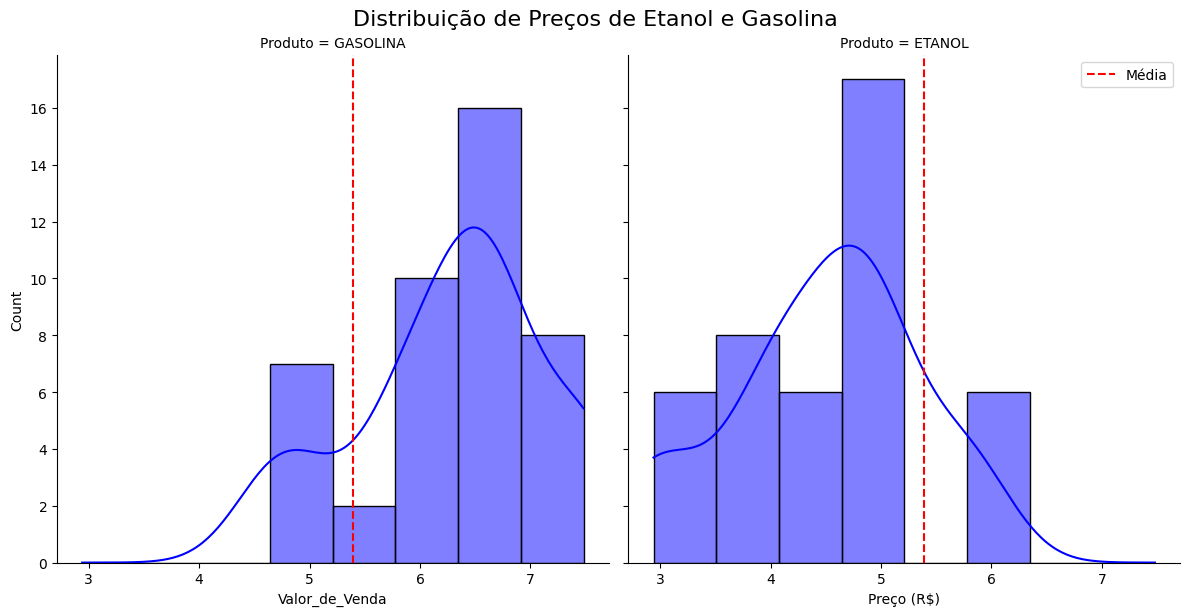

In [84]:
# Removendo duplicatas baseadas na combinação de 'Data da Coleta' e 'Produto'
totaldevendas_unique = totaldevendas.drop_duplicates(subset=['Data da Coleta', 'Produto'])

# Filtrando para excluir a gasolina aditivada
totaldevendas_unique = totaldevendas_unique[totaldevendas_unique['Produto'] != 'GASOLINA ADITIVADA']

# Calculando a média dos preços
media_preco = totaldevendas_unique['Valor_de_Venda'].mean()

# Criando um gráfico displot com duas colunas, uma para cada valor único em 'Produto'
sns.displot(data=totaldevendas_unique, x="Valor_de_Venda", col="Produto", kde=True, color='blue', height=6, aspect=1)

# Adicionando uma linha para a média
for ax in plt.gcf().get_axes():
    ax.axvline(media_preco, color='red', linestyle='--', label='Média')

# Adicionando títulos e ajustando o layout
plt.suptitle('Distribuição de Preços de Etanol e Gasolina', y=1.02, fontsize=16)
plt.xlabel('Preço (R$)')
plt.ylabel('Frequência')
plt.legend()
plt.show()

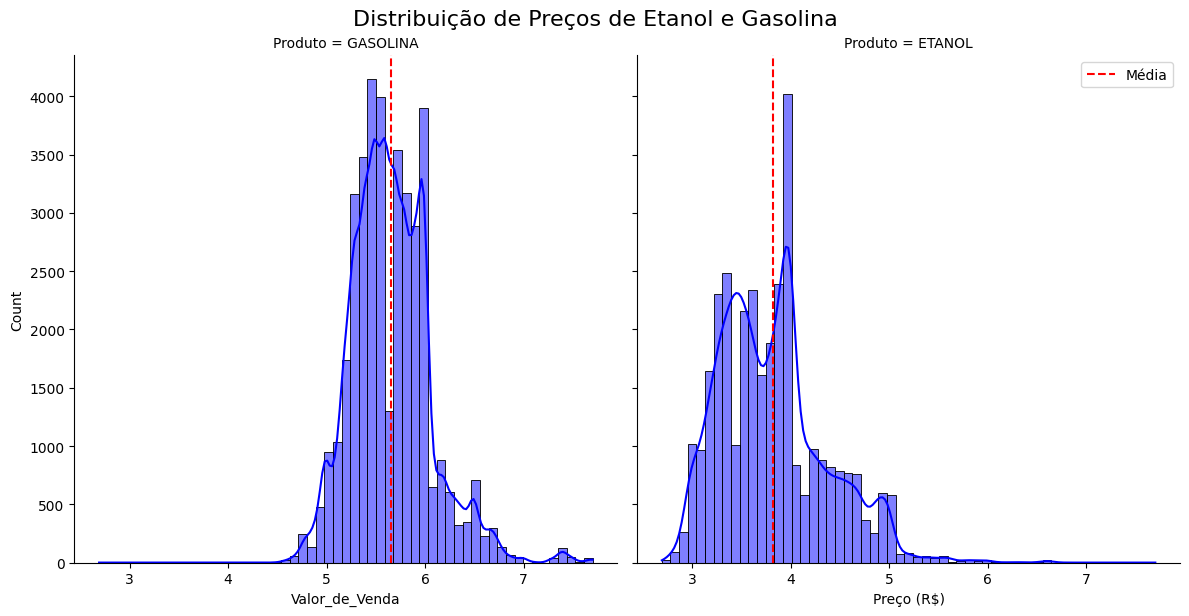

In [85]:
# Removendo duplicatas baseadas na combinação de 'Data da Coleta' e 'Produto'
totaldevendas_unique = totaldevendas.drop_duplicates()

# Filtrando para excluir a gasolina aditivada
totaldevendas_unique = totaldevendas_unique[totaldevendas_unique['Produto'] != 'GASOLINA ADITIVADA']

# Calculando a média dos preços
media_preco = totaldevendas_unique.groupby('Produto')['Valor_de_Venda'].mean()

# Criando um gráfico displot com duas colunas, uma para cada valor único em 'Produto'
sns.displot(data=totaldevendas_unique, x="Valor_de_Venda", col="Produto", kde=True, color='blue', height=6, aspect=1)

# Adicionando uma linha para a média
for ax in zip(plt.gcf().get_axes(), media_preco.sort_index(ascending=False)):
    ax[0].axvline(ax[1], color='red', linestyle='--', label='Média')

# Adicionando títulos e ajustando o layout
plt.suptitle('Distribuição de Preços de Etanol e Gasolina', y=1.02, fontsize=16)
plt.xlabel('Preço (R$)')
plt.ylabel('Frequência')
plt.legend()
plt.show()

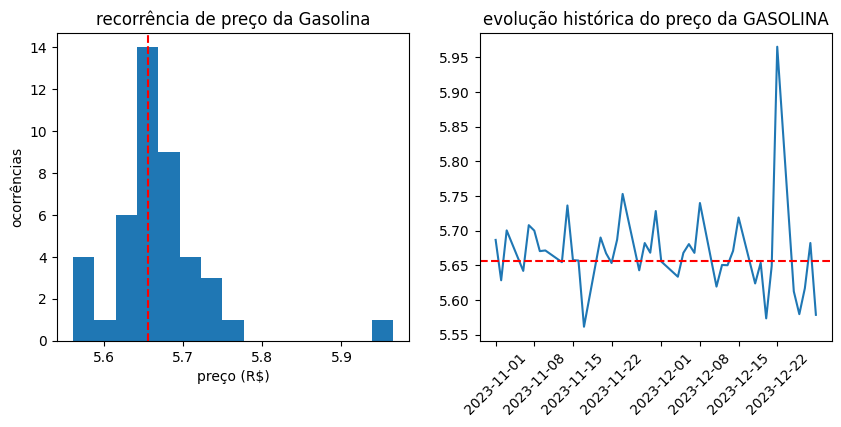

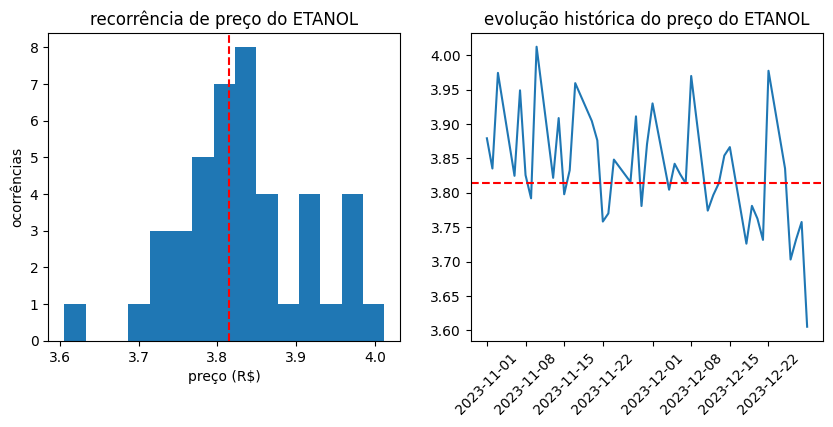

In [86]:
# define tamanho da fonte
fontdict = {'size':10}

# calcula médias
medias = totaldevendas.groupby('Produto').Valor_de_Venda.mean()

# define uma nova figura
plt.figure(figsize=[10, 4])

# filtra a gasolina, destaca as colunas valor de venda e data da coleta
# calcula sua média diária
soduas = totaldevendas[totaldevendas['Produto']=='GASOLINA'].loc[:,['Valor_de_Venda', 'Data da Coleta']].copy()
soduas = soduas.groupby(['Data da Coleta']).Valor_de_Venda.mean()

# histograma de preço
plt.subplot(1, 2, 1)
plt.title('recorrência de preço da Gasolina')
plt.ylabel('ocorrências')
plt.xlabel('preço (R$)')

plt.hist(soduas, 15)
# exibindo média da gasolina
plt.gcf().get_axes()[0].axvline(medias['GASOLINA'], color='red', linestyle='--', label='media')

# gráfico de linha
plt.subplot(1, 2, 2)
plt.title('evolução histórica do preço da GASOLINA')
plt.plot(soduas)
plt.xticks(rotation=45)
# exibindo média da gasolina
plt.gcf().get_axes()[1].axhline(medias['GASOLINA'], color='red', linestyle='--', label='media')

# exibe a imagem da GASOLINA
plt.show()

# define outra figura
plt.figure(figsize=[10, 4])

# filtra o etanol, destaca as colunas valor de venda e data da coleta
# calcula sua média diária
soduas = totaldevendas[totaldevendas['Produto']=='ETANOL'].loc[:,['Valor_de_Venda', 'Data da Coleta']].copy()
soduas = soduas.groupby(['Data da Coleta']).Valor_de_Venda.mean()

# histograma de preço
plt.subplot(1, 2, 1)
plt.title('recorrência de preço do ETANOL')
plt.ylabel('ocorrências')
plt.xlabel('preço (R$)')

plt.hist(soduas, 15)
# exibindo média do etanol
plt.gcf().get_axes()[0].axvline(medias['ETANOL'], color='red', linestyle='--', label='media')

# gráfico de linha
plt.subplot(1, 2, 2)
plt.title('evolução histórica do preço do ETANOL')
plt.plot(soduas)
plt.xticks(rotation=45)
# exibindo média do etanol
plt.gcf().get_axes()[1].axhline(medias['ETANOL'], color='red', linestyle='--', label='media')

# exibe a imagem do ETANOL
plt.show()

In [87]:
# Criar uma lista de tuplas com as informações da data
dataindex = [(totaldevendas['Data da Coleta'].loc[i].day,
              totaldevendas['Data da Coleta'].loc[i].month,
              totaldevendas['Data da Coleta'].loc[i].year) for i in totaldevendas.index]

# Criar um DataFrame pandas com os dados
df_dataindex = pd.DataFrame(dataindex, columns=['Day', 'Month', 'Year'])

# Adicionar o DataFrame 'df_dataindex' ao DataFrame original 'totaldevendas'
totaldevendas = pd.concat([totaldevendas, df_dataindex], axis=1)

# Exibir as primeiras linhas do DataFrame resultante
totaldevendas.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,...,Valor de Compra,Unidade de Medida,Bandeira,Valor_de_Venda,dia,mes,ano,Day,Month,Year
0,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,...,NaN,R$ / litro,VIBRA,6.30,1,11,2023,1,11,2023
1,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,...,NaN,R$ / litro,VIBRA,6.30,1,11,2023,1,11,2023
2,NE,AL,PALMEIRA DOS INDIOS,SEVERINO S. LOPES & CIA. LTDA,05.331.412/0002-09,AVENIDA MUNIZ FALCÃO,1640,"LOTES 08 E 09, LOT. GASTÃO LEÃO REGO",JOSÉ MAIA COSTA,57605-260,...,NaN,R$ / litro,VIBRA,4.88,1,11,2023,1,11,2023
3,NE,AL,PALMEIRA DOS INDIOS,A. B. LESSA NETO & CIA LTDA,05.562.589/0001-35,AVENIDA VIEIRA DE BRITO,1888,NaN,VILA MARIA,57607-570,...,NaN,R$ / litro,VIBRA,6.19,1,11,2023,1,11,2023
4,NE,AL,PALMEIRA DOS INDIOS,A. B. LESSA NETO & CIA LTDA,05.562.589/0001-35,AVENIDA VIEIRA DE BRITO,1888,NaN,VILA MARIA,57607-570,...,NaN,R$ / litro,VIBRA,6.29,1,11,2023,1,11,2023


In [88]:
# foi feita uma série a partir das datas agrupadas e ordenadas por
# ano, mês e dia, nesta ordem, e seus valores médios de venda
totaldevendas[totaldevendas['Produto']=='GASOLINA'].groupby(['ano', 'mes', 'dia']).Valor_de_Venda.mean()

ano   mes  dia
2023  11   1      5.686607
           2      5.628386
           3      5.700328
           6      5.641920
           7      5.707864
           8      5.699992
           9      5.670431
           10     5.671392
           13     5.654572
           14     5.736272
           15     5.657444
           16     5.656853
           17     5.561429
           20     5.690067
           21     5.667321
           22     5.653243
           23     5.686922
           24     5.752889
           27     5.642765
           28     5.682092
           29     5.668155
           30     5.728226
      12   1      5.655455
           4      5.633519
           5      5.667914
           6      5.680567
           7      5.667931
           8      5.739783
           11     5.619282
           12     5.650473
           13     5.650106
           14     5.670751
           15     5.718939
           18     5.623821
           19     5.653653
           20     5.573469
           21

### 2. Qual o preço médio da gasolina e do etanol nesses dois meses?

In [89]:
# Convertendo as colunas de preço para formato numérico
totaldevendas['Valor_de_Venda'] = pd.to_numeric(totaldevendas['Valor_de_Venda'], errors='coerce')

# Agrupando por Produto e calculando a média
media_preco_por_produto = totaldevendas.groupby('Produto')['Valor_de_Venda'].mean()

# Exibindo os resultados
for produto, media in media_preco_por_produto.items():
    print(f"Preço médio de {produto}: R${media:.2f}")

Preço médio de ETANOL: R$3.81
Preço médio de GASOLINA: R$5.66
Preço médio de GASOLINA ADITIVADA: R$5.84


In [90]:
# Convertendo as colunas de preço para formato numérico
totaldevendas['Valor_de_Venda'] = pd.to_numeric(totaldevendas['Valor_de_Venda'], errors='coerce')

# Criando uma tabela de médias por produto e data
tabela_media_produto_data = totaldevendas.pivot_table(index=['Produto', 'Data da Coleta'], values='Valor_de_Venda', aggfunc='mean')

# Exibindo a tabela
print(tabela_media_produto_data)

                                   Valor_de_Venda
Produto            Data da Coleta                
ETANOL             2023-11-01            3.879103
                   2023-11-02            3.835196
                   2023-11-03            3.974205
                   2023-11-06            3.824562
                   2023-11-07            3.948826
...                                           ...
GASOLINA ADITIVADA 2023-12-25            5.798506
                   2023-12-26            5.779585
                   2023-12-27            5.811489
                   2023-12-28            5.878672
                   2023-12-29            5.753567

[129 rows x 1 columns]


### 3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?

In [91]:
# preço médio da GASOLINA por estado nos dois meses
totaldevendas[totaldevendas['Produto']=='GASOLINA'].loc[:,['Estado - Sigla', 'Valor_de_Venda']].groupby('Estado - Sigla').Valor_de_Venda.mean().sort_values(ascending=False)

Estado - Sigla
AC    6.894907
AM    6.601109
RO    6.439335
PA    6.001357
RR    5.892336
BA    5.888282
AL    5.868059
TO    5.841281
CE    5.795289
ES    5.764608
PR    5.746458
SC    5.734883
MS    5.709834
RN    5.696989
RJ    5.695776
SE    5.655691
MT    5.649198
RS    5.605301
PB    5.584381
AP    5.568994
MG    5.539809
GO    5.532579
DF    5.532317
SP    5.522834
MA    5.512465
PE    5.472004
PI    5.386226
Name: Valor_de_Venda, dtype: float64

In [92]:
# preço médio do ETANOL por estado nos dois meses
totaldevendas[totaldevendas['Produto']=='ETANOL'].loc[:,['Estado - Sigla', 'Valor_de_Venda']].groupby('Estado - Sigla').Valor_de_Venda.mean().sort_values(ascending=False)

Estado - Sigla
AP    5.397500
RO    5.088654
RR    4.872857
AC    4.808250
PA    4.606010
RS    4.596458
AM    4.551735
CE    4.528349
RN    4.441496
MA    4.424092
SE    4.381404
SC    4.343896
AL    4.306241
TO    4.247546
BA    4.238109
ES    4.138996
RJ    4.102228
PI    4.077849
PE    3.997808
PB    3.980656
PR    3.761886
MS    3.648490
DF    3.600460
MG    3.553628
GO    3.503608
SP    3.412366
MT    3.170450
Name: Valor_de_Venda, dtype: float64

In [93]:
# Considere que df_combustiveis já contém os dados concatenados de novembro e dezembro
# Certifique-se de que você tem colunas 'Preco_Etanol', 'Preco_Gasolina' e 'Estado'

# Convertendo as colunas de preço para formato numérico
totaldevendas['Valor de Venda'] = pd.to_numeric(totaldevendas['Valor de Venda'], errors='coerce')
totaldevendas['Valor de Venda'] = pd.to_numeric(totaldevendas['Valor de Venda'], errors='coerce')

# Calculando o preço médio do etanol e da gasolina por estado
preco_medio_estado = totaldevendas.groupby('Estado - Sigla').agg({'Valor de Venda': 'mean'})

# Identificando os 5 estados mais caros para o etanol
top5_etanol = preco_medio_estado['Valor de Venda'].nlargest(5)

# Identificando os 5 estados mais caros para a gasolina
top5_gasolina = preco_medio_estado['Valor de Venda'].nlargest(5)

# Exibindo os resultados
print("Top 5 Estados mais caros para o Etanol:")
print(top5_etanol)

print("\nTop 5 Estados mais caros para a Gasolina:")
print(top5_gasolina)


Top 5 Estados mais caros para o Etanol:
Estado - Sigla
PA    6.000
PI    6.000
RJ    6.000
RR    6.000
AL    5.375
Name: Valor de Venda, dtype: float64

Top 5 Estados mais caros para a Gasolina:
Estado - Sigla
PA    6.000
PI    6.000
RJ    6.000
RR    6.000
AL    5.375
Name: Valor de Venda, dtype: float64


### 4. Qual o preço médio da gasolina e do etanol por estado?

In [94]:
# Convertendo as colunas de preço para formato numérico
totaldevendas['Valor de Venda'] = pd.to_numeric(totaldevendas['Valor de Venda'], errors='coerce')
totaldevendas['Valor de Venda'] = pd.to_numeric(totaldevendas['Valor de Venda'], errors='coerce')

# Removendo linhas com valores NaN
totaldevendas = totaldevendas.dropna(how='all')

# Calculando o preço médio do etanol e da gasolina por estado
preco_medio_estado = totaldevendas.groupby('Estado - Sigla').agg({'Valor de Venda': 'mean', 'Valor de Venda': 'mean'})

# Exibindo os resultados
# Exibindo o resultado
print("Preço Médio por Estado:")
print(preco_medio_estado)


# Calculando o valor médio de venda
valor_medio_venda = totaldevendas['Valor de Venda'].mean()
print(f"Valor Médio de Venda: R${valor_medio_venda:.2f}")

Preço Médio por Estado:
                Valor de Venda
Estado - Sigla                
AC                         NaN
AL                    5.375000
AM                         NaN
AP                         NaN
BA                    5.066667
CE                    5.200000
DF                         NaN
ES                         NaN
GO                    5.000000
MA                    5.208333
MG                         NaN
MS                         NaN
MT                    3.166667
PA                    6.000000
PB                         NaN
PE                    4.428571
PI                    6.000000
PR                         NaN
RJ                    6.000000
RN                         NaN
RO                    5.000000
RR                    6.000000
RS                         NaN
SC                         NaN
SE                    4.000000
SP                    5.250000
TO                    4.538462
Valor Médio de Venda: R$4.93


### 5. Qual o município que possui o menor preço para a gasolina e para o etanol?

In [95]:
# Encontrar o menor preço para Gasolina
min_preco_gasolina = totaldevendas[totaldevendas['Produto'] == 'GASOLINA']['Valor_de_Venda'].min()
municipio_min_preco_gasolina = totaldevendas[(totaldevendas['Produto'] == 'GASOLINA') & (totaldevendas['Valor_de_Venda'] == min_preco_gasolina)]['Municipio'].iloc[0]

# Encontrar o menor preço para Etanol
min_preco_etanol = totaldevendas[totaldevendas['Produto'] == 'ETANOL']['Valor_de_Venda'].min()
municipio_min_preco_etanol = totaldevendas[(totaldevendas['Produto'] == 'ETANOL') & (totaldevendas['Valor_de_Venda'] == min_preco_etanol)]['Municipio'].iloc[0]

print(f"Município com o menor preço para Gasolina: {municipio_min_preco_gasolina} (Preço: R${min_preco_gasolina:.2f})")
print(f"Município com o menor preço para Etanol: {municipio_min_preco_etanol} (Preço: R${min_preco_etanol:.2f})")

Município com o menor preço para Gasolina: SAO CARLOS (Preço: R$4.49)
Município com o menor preço para Etanol: SAO PAULO (Preço: R$2.69)


### 6. Qual município possui o maior preço médio da gasolina e do etanol?

#### Gasolina

In [96]:
totaldevendas[totaldevendas['Produto']=='GASOLINA'].groupby(['Municipio']).Valor_de_Venda.mean().sort_values(ascending=False)

Municipio
TEFE                   7.687222
CRUZEIRO DO SUL        7.447358
PARINTINS              7.342857
XINGUARA               6.846765
ALTAMIRA               6.738333
                         ...   
CARUARU                5.155515
GARANHUNS              5.144595
SAO LUIS               4.997284
SAO JOSE DE RIBAMAR    4.957037
TRINDADE               4.903437
Name: Valor_de_Venda, Length: 459, dtype: float64

O município que tem o maior preço médio da gasolina é Tefe

#### Etanol

In [97]:
totaldevendas[totaldevendas['Produto']=='ETANOL'].groupby(['Municipio']).Valor_de_Venda.mean().sort_values(ascending=False)

Municipio
SANTAREM           6.088125
ALENQUER           5.900000
CRUZEIRO DO SUL    5.790000
XINGUARA           5.625000
MACAPA             5.600000
                     ...   
JOSE BONIFACIO     3.046182
ARACATUBA          3.004870
ADAMANTINA         2.999583
BIRIGUI            2.975357
TRINDADE           2.886066
Name: Valor_de_Venda, Length: 454, dtype: float64

O município que tem o maior preço médio do etanol é Santarem

### 7. Qual a região que possui o maior valor médio da gasolina?

In [98]:
dic_regiao = {'CO': 'Centro Oeste', 'N': 'Norte', 'NE': 'Nordeste', 'S': 'Sul', 'SE': 'Suldeste'}
sigla_regiao = totaldevendas[totaldevendas['Produto'] == 'GASOLINA'].groupby(['Regiao - Sigla'])['Valor_de_Venda'].mean().idxmax()
print(f'A região {dic_regiao[sigla_regiao]} tem o maior valor médio da gasolina')

A região Norte tem o maior valor médio da gasolina


### 8. Qual a região que possui o menor valor médio do etanol?

In [99]:
dic_regiao = {'CO': 'Centro Oeste', 'N': 'Norte', 'NE': 'Nordeste', 'S': 'Sul', 'SE': 'Suldeste'}
sigla_regiao = totaldevendas[totaldevendas['Produto'] == 'ETANOL'].groupby(['Regiao - Sigla'])['Valor_de_Venda'].mean().idxmin()
print(f'A região que possui o menor valor médio de etanol é o {dic_regiao[sigla_regiao]}')

A região que possui o menor valor médio de etanol é o Centro Oeste


### 9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?

In [100]:
# tabela relação entre combustível e região
etanol_regiao = totaldevendas[totaldevendas['Produto']=='ETANOL'].groupby(['Regiao - Sigla']).Valor_de_Venda.mean()
etanol_regiao = pd.DataFrame(etanol_regiao, index=list(etanol_regiao.index))

gasolina_regiao = totaldevendas[totaldevendas['Produto']=='GASOLINA'].groupby(['Regiao - Sigla']).Valor_de_Venda.mean()
gasolina_regiao = pd.DataFrame(gasolina_regiao, index=list(gasolina_regiao.index))

regiao = pd.DataFrame()
regiao['gasolina'] = gasolina_regiao
regiao['etanol'] = etanol_regiao
regiao

,gasolina,etanol
CO,5.580768,3.479649
N,6.171947,4.584460
NE,5.686899,4.249076
S,5.687915,4.078209
SE,5.564621,3.572342


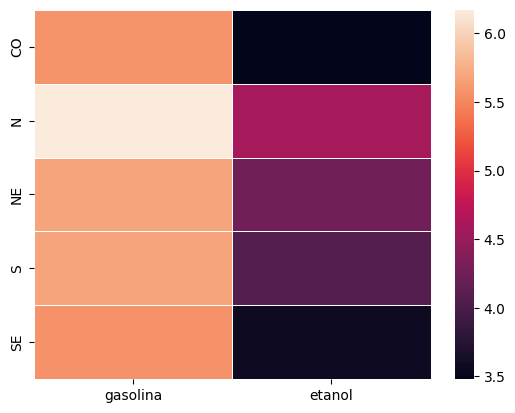

In [101]:
# mapa de calor comparando o preço médio de cada combustível por região
ax = sns.heatmap(regiao, linewidth=0.5)

### 10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

In [102]:
etanol_bandeira = totaldevendas[totaldevendas['Produto']=='ETANOL'].groupby(['Bandeira'], dropna=False).Valor_de_Venda.mean()
etanol_bandeira = pd.DataFrame(etanol_bandeira, index=etanol_bandeira.index)
gasolina_bandeira = totaldevendas[totaldevendas['Produto']=='GASOLINA'].groupby(['Bandeira'], dropna=False).Valor_de_Venda.mean()
gasolina_bandeira = pd.DataFrame(gasolina_bandeira, index=gasolina_bandeira.index)
bandeiras = pd.DataFrame(index=totaldevendas['Bandeira'].unique())
bandeiras['Etanol'] = etanol_bandeira
bandeiras['Gasolina'] = gasolina_bandeira
bandeiras.T

,VIBRA,IPIRANGA,RAIZEN,BRANCA,ALESAT,SABBÁ,DISLUB,SETTA DISTRIBUIDORA,STANG,ATEM' S,...,TDC DISTRIBUIDORA,D`MAIS,RIO BRANCO,IDAZA,UNI,WALENDOWSKY,SUL COMBUSTÍVEIS,REJAILE,RZD DISTRIBUIDORA,ROYAL FIC
Etanol,3.959784,3.823806,3.750276,3.713662,3.832511,4.567143,4.164898,3.8455,3.964444,4.557723,...,3.708824,3.2650,3.752632,4.785,3.8550,4.504286,NaN,NaN,4.5375,3.39
Gasolina,5.746315,5.739576,5.657004,5.530220,5.615676,5.854659,5.633065,5.3880,5.593293,6.563779,...,5.250000,5.3225,5.803158,5.890,5.7875,5.980000,5.983333,5.82,6.3625,5.19


<Axes: >

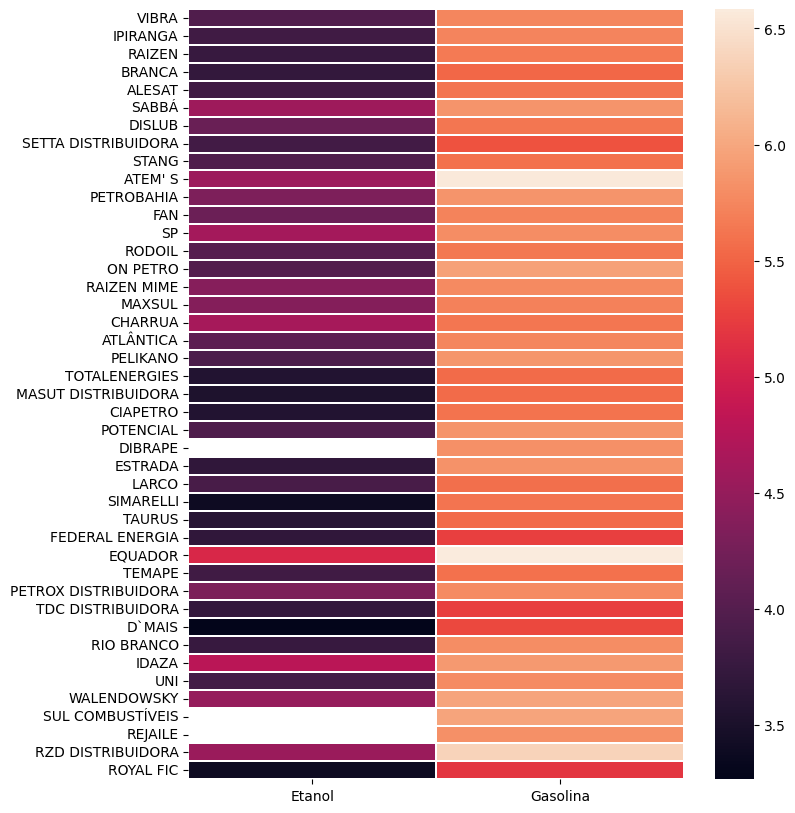

In [111]:
# mapa de calor comparando a média de preço de cada combustível por bandeira
plt.figure(figsize=[8, 10])
sns.heatmap(bandeiras, linewidth=0.1)

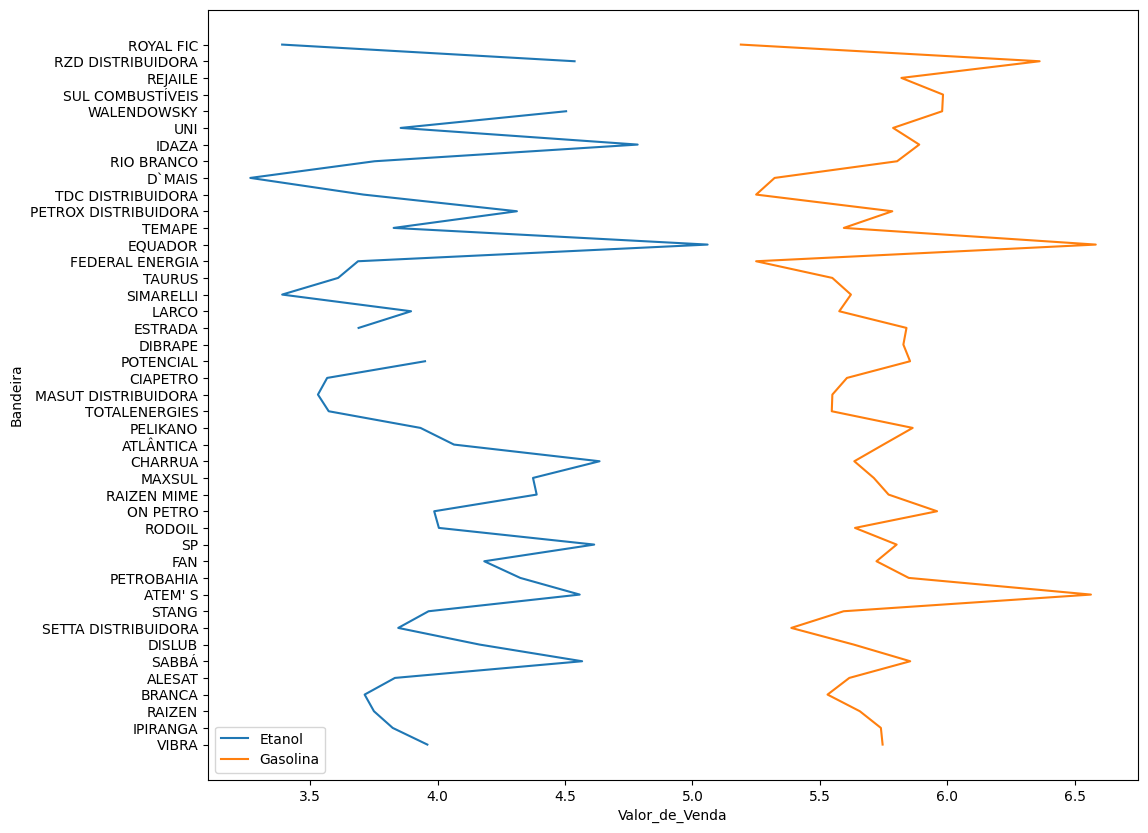

In [104]:
# gráfico de linha com bandeiras e valores de cada combustível
plt.figure(figsize=(12, 10))

plt.plot(bandeiras['Etanol'], bandeiras.index, label='Etanol')
plt.plot(bandeiras['Gasolina'], bandeiras.index, label='Gasolina')

plt.xlabel('Valor_de_Venda')
plt.ylabel('Bandeira')
plt.legend()

plt.show()

### 11. Qual é a bandeira que possui o maior preço médio de venda para o etanol?

In [105]:
# Filtrar apenas os dados de etanol
dados_etanol = totaldevendas[totaldevendas['Produto'] == 'ETANOL']

# Calcular a média de preços por bandeira
media_por_bandeira_etanol = dados_etanol.groupby('Bandeira')['Valor_de_Venda'].mean()

# Identificar a bandeira com o maior preço médio
maior_preco_bandeira_etanol = media_por_bandeira_etanol.idxmax()
print(f"A bandeira com o maior preço médio de venda para etanol é: {maior_preco_bandeira_etanol}")


A bandeira com o maior preço médio de venda para etanol é: EQUADOR


###12. Qual é a bandeira com o maior preço médio de venda de gasolina no estado de São Paulo?


In [106]:
# Filtrar dados apenas para o estado de SP e o produto GASOLINA
dados_sp_gasolina = totaldevendas[(totaldevendas['Estado - Sigla'] == 'SP') & (totaldevendas['Produto'] == 'GASOLINA')]

# Calcular a média de preços por bandeira
media_por_bandeira_sp_gasolina = dados_sp_gasolina.groupby('Bandeira')['Valor_de_Venda'].mean()

# Identificar a bandeira com o maior preço médio
maior_preco_bandeira_sp_gasolina = media_por_bandeira_sp_gasolina.idxmax()
print(f"A bandeira com o maior preço médio de venda de gasolina no estado de SP é: {maior_preco_bandeira_sp_gasolina}")


A bandeira com o maior preço médio de venda de gasolina no estado de SP é: VIBRA


###13. Quais são os 5 municípios com os preços mais altos para gasolina?

In [107]:
# Filtrar apenas os dados de gasolina
dados_gasolina = totaldevendas[totaldevendas['Produto'] == 'GASOLINA']

# Calcular a média de preços por município
media_por_municipio = dados_gasolina.groupby('Municipio')['Valor_de_Venda'].mean()

# Identificar os 5 municípios com os preços mais altos
top5_municipios = media_por_municipio.nlargest(5)
print("Os 5 municípios com os preços mais altos para gasolina são:")
print(top5_municipios)


Os 5 municípios com os preços mais altos para gasolina são:
Municipio
TEFE               7.687222
CRUZEIRO DO SUL    7.447358
PARINTINS          7.342857
XINGUARA           6.846765
ALTAMIRA           6.738333
Name: Valor_de_Venda, dtype: float64
